In [226]:
# pip install pillow==10.4
import PIL
print(PIL.__version__)

10.4.0


In [227]:
import torchvision.transforms as tt
from PIL import Image
import matplotlib.pyplot as plt
import torch

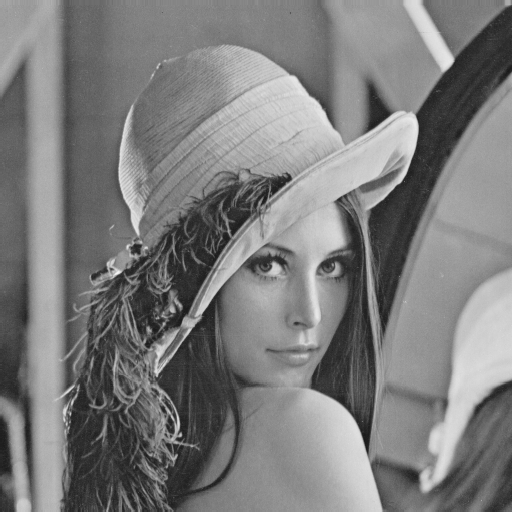

In [228]:
img = Image.open('../dataset/cvimages/Lena.tif')
img

In [229]:
img.info

{'compression': 'raw', 'dpi': (72.0, 72.0)}

In [230]:
# 定义数据增强和预处理操作
transform = tt.Compose([
    tt.RandomCrop(512, padding=40),   # 随机裁剪为32x32大小，并增加4像素的填充
    tt.RandomHorizontalFlip(),      # 随机水平翻转
    tt.RandomVerticalFlip(),        # 随机垂直翻转
    tt.ToTensor(),                  # 转换为张量
    # tt.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # 三通道归一化
    tt.Normalize(mean=[0.4734], std=[0.2009])  # 用三通道的均值来做单通道归一化
])

In [231]:
img_tensor = transform(img)

In [232]:
to_tensor = tt.ToTensor()

In [233]:
# 将图像转为张量，但不做归一化，以便显示
img_tensor_no_norm = to_tensor(img)

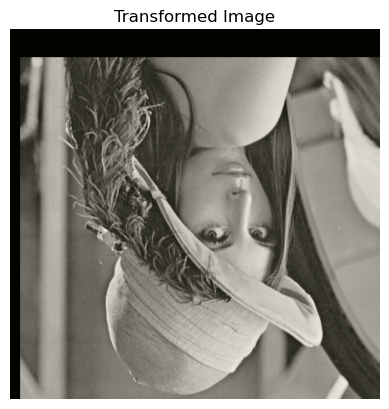

In [234]:
# 将张量转换回图片格式以显示
def imshow(tensor, title=None):
    tensor = tensor.clone().detach()  # 克隆以确保不更改原始张量
    tensor = tensor * torch.Tensor([0.2023, 0.1994, 0.2010]).view(3, 1, 1) + torch.Tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)  # 去归一化
    tensor = torch.clamp(tensor, 0, 1)  # 限制像素值在0-1之间
    img = tensor.permute(1, 2, 0).numpy()  # 改变维度顺序为 HWC
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

# 显示预处理后的图片
imshow(img_tensor, title="Transformed Image")